# Contents
1. Importing Libraries
2. Preparing Data
3. Data Cleaning<br>
    a. Removing extra spaces<br>
    b. Removing stopwords<br>
    c. Removing punctuations<br>
    d. Lemmetizing to root form<br>
4. Data Visualization

# 1. Importing Libraries

In [ ]:
!pip install PyMuPDF

In [ ]:
!pip install PyPDF2

In [ ]:
!pip install pdfminer.six

In [ ]:
!pip install docx2txt

In [ ]:
# importing required modules
import PyPDF2
import pandas as pd
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter  #process_pdf
from pdfminer.pdfpage import PDFPage
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
import re
from io import StringIO
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf
import spacy
from spacy.matcher import Matcher
import io
from os import listdir
from os.path import isfile, join
import docx2txt
import numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
import plotly.express as px
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# 2. Preparing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
text = []
mypath = '/content/drive/MyDrive/Resumes2'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
def extract_text_from_doc(doc_path):
    temp = docx2txt.process(doc_path)
    text = [line.replace('\t', ' ') for line in temp.split('\n') if line]
    return ' '.join(text)

# Calling function
for i in range(len(onlyfiles)):
    text.append(extract_text_from_doc(f'/content/drive/MyDrive/Resumes2/{onlyfiles[i]}'))

In [ ]:
onlyfiles

['Anil kumar.docx',
 'AradhanaTripathi.docx',
 'Harikrishna Akula_Hexaware.docx',
 'Hari Krishna M_Hexaware.docx',
 'Gopi Krishna_Hexaware.docx',
 'ChinnaSubbarayuduM_Hexaware.docx',
 'Buddha Vamsi.docx',
 'Himaja G_(Hexaware).docx',
 'kamballapradeep.docx',
 'Internship_Ravali_Musquare Technologies (1).docx',
 'Jyotiverma_Heaware.docx',
 'J. Sumanth Royal_Hexaware.docx',
 'Internship_Susovan Bag_Musquare Technologies.docx',
 'Hima Mendu_Hexaware.docx',
 'Peoplesoft Admin_G Ananda Rayudu.docx',
 'P V Sai Krishna_ Hexaware.docx',
 'MooraboyinaGuravaiah_Hexaware.docx',
 'Peoplesoft Admin_Gangareddy.docx',
 'Neeraj Mishra.docx',
 'Madeeswar A_Hexaware.docx',
 'Peoplesoft Admin_AnubhavSingh.docx',
 'Naresh Babu Cherukuri_Hexaware.docx',
 'Nazeer Basha.docx',
 'Peoplesoft Admin_SirazuddinMohammad.docx',
 'PeopleSoft DBA_Ganesh Alladi.docx',
 'PeopleSoft DBA_Vivekanand Sayana.docx',
 'Peoplesoft Admin_Murali.docx',
 'Peoplesoft FSCM_Murali.docx',
 'Peoplesoft Finance_Arun Venu.docx',
 'Peopl

In [ ]:
text

['ANIL KUMAR MADDUKURI     SQL & MSBI Developer       Summary 2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools. Expertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables. Handled data manipulation and data consistency by creating Views, Triggers, and Synonyms. Hands on experience in creation, optimization and debugging Stored Procedure and Functions. Familiar in writing queries using CTE, Temporary Tables and Table Variables. Good experience in using Set Operators like Union, Union All, Except and Intersect to assist required data. Experience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions. Worked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services. Used containers such as for each loop container and sequen

In [ ]:
text[0]

'ANIL KUMAR MADDUKURI     SQL & MSBI Developer       Summary 2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools. Expertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables. Handled data manipulation and data consistency by creating Views, Triggers, and Synonyms. Hands on experience in creation, optimization and debugging Stored Procedure and Functions. Familiar in writing queries using CTE, Temporary Tables and Table Variables. Good experience in using Set Operators like Union, Union All, Except and Intersect to assist required data. Experience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions. Worked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services. Used containers such as for each loop container and sequenc

In [ ]:
text[0][:500]

'ANIL KUMAR MADDUKURI     SQL & MSBI Developer       Summary 2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools. Expertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables. Handled data manipulation and data consistency by creating Views, Triggers, and Synonyms. Hands on experience in creation, optimization and debugging Stored Procedure and Functions. Familia'

In [ ]:
text[1]

'Aradhana Tripathi Current Location: Gachibowli, Hyderabad Profile Summary: An accomplished data driven analytical professional have more than 4 years of working experience in information technology & Service industry. Currently working as SQL Database Developer and have 3 years of experience in database design, development, analysis and support of using MS SQL Server, MySQL (MariaDB) and Athena (AWS) in development, testing and production environments. Extensive experience in writing complex queries, creating Tables, Views, Union, Triggers, Stored Procedures, User Defined Functions (UDF’s), System Defined Functions, and other T- SQL statements, Constraints and Indexes using various DDL and DML Commands. Experience in using sub-queries and joins to simplify complex queries involving multiple tables. Experience in working on amazon relational database (AWS RDS). Have basic understanding on using analytical tools and technologies such as SAS, R, Bigdata (Hadoop, Hive, HQL query) etc. Had

In [ ]:
# Adding fake email ids, phone numbers and links
f_id = 'abc@xyz.com'
f_no = '+911234567890'
f_linkedin = 'https://www.linkedin.com/fake'
f_github = 'https://www.github.com/fake'
f_str = f_id+' '+f_no+' '+ f_linkedin+ ' '+f_github

new_text = []
for i in text:
    new_text.append(i+' '+f_str)

In [ ]:
new_text[0]

'ANIL KUMAR MADDUKURI     SQL & MSBI Developer       Summary 2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools. Expertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables. Handled data manipulation and data consistency by creating Views, Triggers, and Synonyms. Hands on experience in creation, optimization and debugging Stored Procedure and Functions. Familiar in writing queries using CTE, Temporary Tables and Table Variables. Good experience in using Set Operators like Union, Union All, Except and Intersect to assist required data. Experience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions. Worked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services. Used containers such as for each loop container and sequenc

In [ ]:
new_text[0][:500]

'ANIL KUMAR MADDUKURI     SQL & MSBI Developer       Summary 2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools. Expertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables. Handled data manipulation and data consistency by creating Views, Triggers, and Synonyms. Hands on experience in creation, optimization and debugging Stored Procedure and Functions. Familia'

In [ ]:
new_text[0][-500:]

'such as drilldown, drill through, sub reports.  Involved in setting up SQL Server Agent Jobs for periodic Backups with backup devices, database maintenance plans and recovery. Maintained / managed database agent jobs, check for failures and resolve failure issues. Used SQL Profiler and query tuning Wizard to troubleshoot problems and queries. Education B.Tech - Velagapudi siddhartha engineering college,Vijayawada abc@xyz.com +911234567890 https://www.linkedin.com/fake https://www.github.com/fake'

In [ ]:
new_text

['ANIL KUMAR MADDUKURI     SQL & MSBI Developer       Summary 2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools. Expertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables. Handled data manipulation and data consistency by creating Views, Triggers, and Synonyms. Hands on experience in creation, optimization and debugging Stored Procedure and Functions. Familiar in writing queries using CTE, Temporary Tables and Table Variables. Good experience in using Set Operators like Union, Union All, Except and Intersect to assist required data. Experience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions. Worked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services. Used containers such as for each loop container and sequen

In [ ]:
# Storing in a DataFrame
import pandas as pd
df = pd.DataFrame(new_text, columns=['Text'])
df.head()

,Text
0,ANIL KUMAR MADDUKURI SQL & MSBI Developer ...
1,Aradhana Tripathi Current Location: Gachibowli...
2,Harikrishna Akula ...
3,Hari Krishna M Summary: A result oriented prof...
4,Name : Gopi Krishna Reddy ...


In [ ]:
df.to_csv('ResumeDF.csv')

In [ ]:
df

,Text
0,ANIL KUMAR MADDUKURI SQL & MSBI Developer ...
1,Aradhana Tripathi Current Location: Gachibowli...
2,Harikrishna Akula ...
3,Hari Krishna M Summary: A result oriented prof...
4,Name : Gopi Krishna Reddy ...
...,...
73,"C O N T A C T : Address: Manyata Tech Park, Na..."
74,Shireesh Balasani ...
75,Venkateswarlu.B Workday Consultant ...
76,WORKDAY | HCM | FCM Name : Kumar S.S Role ...


In [ ]:
df = pd.read_csv('ResumeDF.csv')
df = df.iloc[:,1:]
df.head(10)

,Text
0,ANIL KUMAR MADDUKURI SQL & MSBI Developer ...
1,Aradhana Tripathi Current Location: Gachibowli...
2,Harikrishna Akula ...
3,Hari Krishna M Summary: A result oriented prof...
4,Name : Gopi Krishna Reddy ...
5,Chinna Subbarayudu M DOB: 06th March 1994 Nati...
6,BUDDHA VAMSI ...
7,G Himaja ...
8,KAMBALLA PRADEEP ...
9,Name: Ravali P ...


In [ ]:
df.shape

(78, 1)

# 3. Data Cleaning

In [ ]:
stemmer = PorterStemmer()
lemmetizer = WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
more_stop_words = ['\x0c','"','-','_','.']
stop_words.extend(more_stop_words)

clean_data() takes sentence separated string input and cleans the data i.e. removing stopwords and punctuation and returning lemmetized string output

In [ ]:
def clean_data(text):
    re.sub(r'[\d]','',text)
    re.sub(r'[^a-zA-Z]','',text)
    re.sub('\s+',' ',text)
    text_clean = []
    text_tokens = word_tokenize(text)
    #text_tokens = tokenizer.tokenize(text)    
    for word in text_tokens:
        if (word not in stop_words and # remove stopwords
            word not in string.punctuation): # remove punctuation
            stem_word = lemmetizer.lemmatize(word) # stemming word
            text_clean.append(stem_word)
    
    list_to_str = ' '.join([str(ele) for ele in text_clean])
    return list_to_str.lower()

call_to_clean() takes full text as input, breaks them into sentences and calls the clean_data() with the separated sentences as arguments

In [ ]:
clean_text = []
def call_to_clean(text):
    sentences = re.split(r'\n+',text)
    sentence_df = pd.DataFrame(sentences, columns = ['Text'])
    sentence_df['Text'] = sentence_df['Text'].apply(clean_data)
    clean_text.append(' '.join(sentence_df['Text']))

In [ ]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')

for i in range(len(df)):
    call_to_clean(df['Text'].loc[i])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
clean_text

['anil kumar maddukuri sql msbi developer summary 2.4 year experience ms sql server ssms creating ssis package ssrs reports using microsoft business intelligence msbi tool expertise various type joins sub queries writing complex query involving multiple table handled data manipulation data consistency creating views triggers synonyms hands experience creation optimization debugging stored procedure functions familiar writing query using cte temporary tables table variables good experience using set operators like union union all except intersect assist required data experience manipulate data multiple table report client using aggregate functions windows functions string functions worked extensively data extraction transformation loading etl process sql server integration services used container loop container sequence container load data multiple source file database table expertise using task like data flow task execute sql task control flow task execute package task execute process 

In [ ]:
clean_text[5]

'chinna subbarayudu m dob 06th march 1994 nationality indian profile summary having around 5.1 year it experience developing implementation erp technology using workday hcm etl informatica technology 3.6 year experience workday integration consultant involved maintenance implementation experience phase workday like requirement gathering analysis design development testing hands experience inbound/ outbound integration using core connector workday studio managing business process working eib report writer developed maintained custom-report type advanced matrix composite using report writer tool involved transformation xml xslt presenting data different web services building workday integration eib calculated field custom reports writing xslt transformation code developed testing strategy validation scenario along project scope requirement document prioritizing reproducing verifying bug fix different workday integration having knowledge xml wd-soap web service wd- rest web service experi

In [ ]:
clean_text[5][:200]

'chinna subbarayudu m dob 06th march 1994 nationality indian profile summary having around 5.1 year it experience developing implementation erp technology using workday hcm etl informatica technology 3'

In [ ]:
clean_text[0]

'anil kumar maddukuri sql msbi developer summary 2.4 year experience ms sql server ssms creating ssis package ssrs reports using microsoft business intelligence msbi tool expertise various type joins sub queries writing complex query involving multiple table handled data manipulation data consistency creating views triggers synonyms hands experience creation optimization debugging stored procedure functions familiar writing query using cte temporary tables table variables good experience using set operators like union union all except intersect assist required data experience manipulate data multiple table report client using aggregate functions windows functions string functions worked extensively data extraction transformation loading etl process sql server integration services used container loop container sequence container load data multiple source file database table expertise using task like data flow task execute sql task control flow task execute package task execute process t

### Cleaned Data

In [ ]:
df['Clean Text'] = clean_text
df

,Text,Clean Text
0,ANIL KUMAR MADDUKURI SQL & MSBI Developer ...,anil kumar maddukuri sql msbi developer summar...
1,Aradhana Tripathi Current Location: Gachibowli...,aradhana tripathi current location gachibowli ...
2,Harikrishna Akula ...,harikrishna akula summary 5.2 year it experien...
3,Hari Krishna M Summary: A result oriented prof...,hari krishna m summary a result oriented profe...
4,Name : Gopi Krishna Reddy ...,name gopi krishna reddy professional summery w...
...,...,...
73,"C O N T A C T : Address: Manyata Tech Park, Na...",c o n t a c t address manyata tech park nagava...
74,Shireesh Balasani ...,shireesh balasani hcm consultant profile summa...
75,Venkateswarlu.B Workday Consultant ...,venkateswarlu.b workday consultant professiona...
76,WORKDAY | HCM | FCM Name : Kumar S.S Role ...,workday hcm fcm name kumar s.s role workday co...


In [ ]:
df.to_csv('processed_resume_data.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cleaned_resume_data.csv')
df = df.iloc[:,1:]
df.head()

,Text,Clean Text
0,Personal Details Name Pritam Biswas Date Of ...,personal details name pritam biswas date of bi...
1,R Ahmed ...,r ahmed peoplesoft technical consultant profes...
2,Priyabrata Hota CAREER OBJECTIVE Pursuing Pe...,priyabrata hota career objective pursuing peop...
3,SQL DEVELOPER Name: - Bandi prem sai Career ...,sql developer name bandi prem sai career objec...
4,Arun Venu EXPERIENCE SUMMARY Experience ...,arun venu experience summary experience 04 yea...


# 4. Visualization

## a. WordCloud of Commonly used words in the Resumes

In [ ]:
sentences = []
for i in range(len(df)):
    sentences.append(sent_tokenize(df['Text'][i]))
# sentence_df = pd.DataFrame(sentences, columns = ['Text'])

In [ ]:
sentences2 = sent_tokenize(df['Text'][0])
sentence_df2 = pd.DataFrame(sentences2, columns = ['Text'])

In [ ]:
import numpy as np
sentences = np.array(str(sentences)).reshape(-1,1)
sentence_df = pd.DataFrame(sentences, columns = ['Text'])

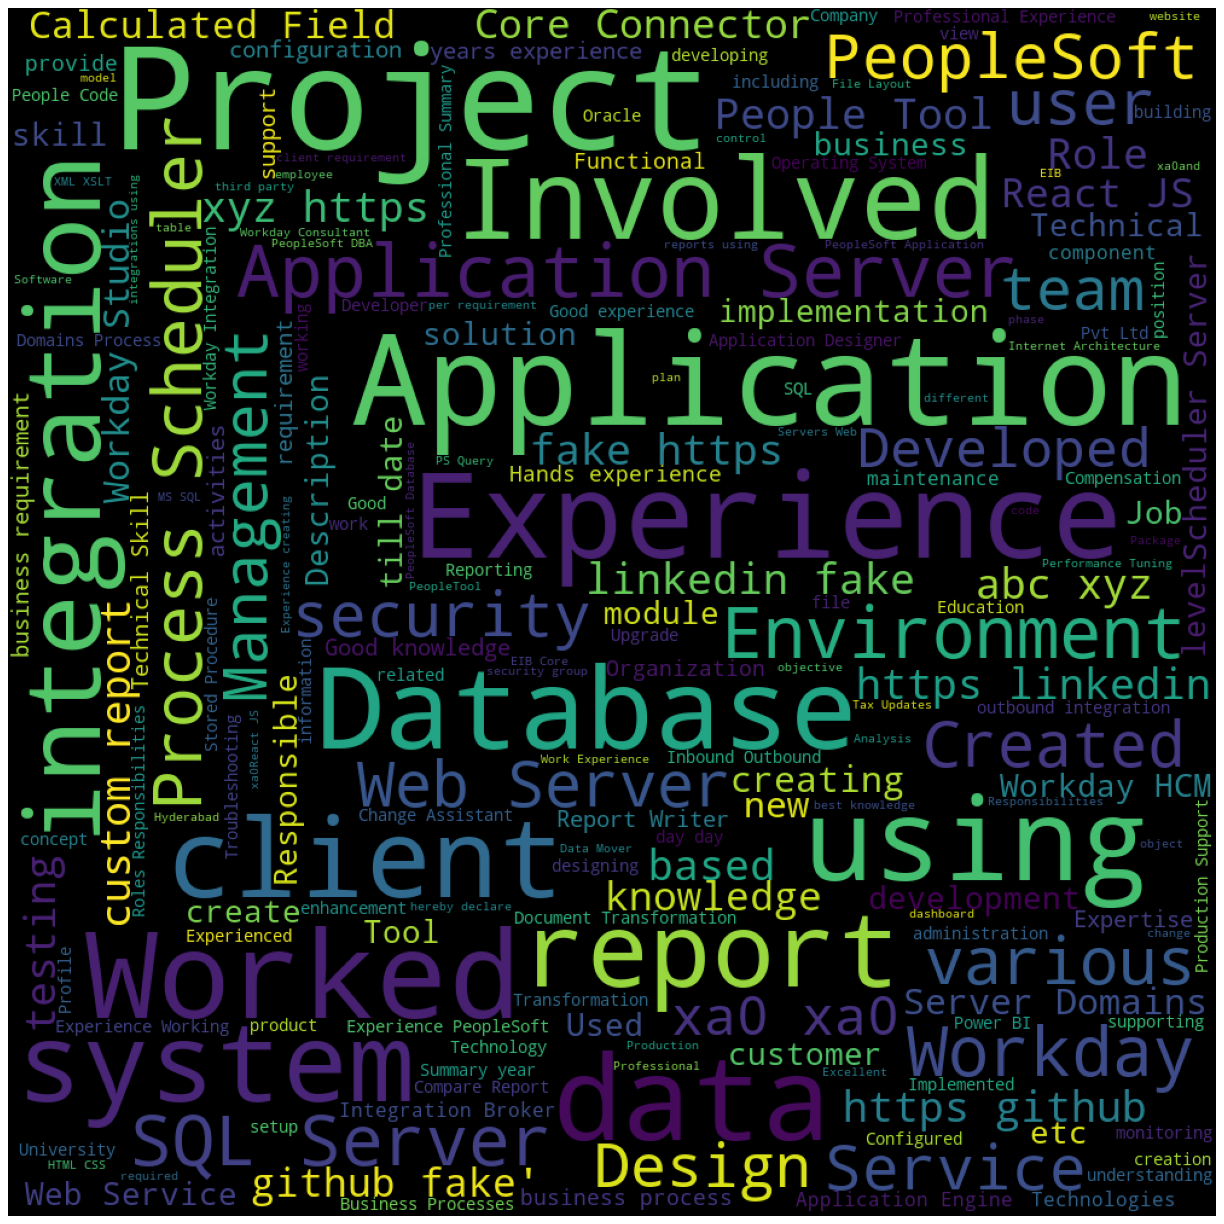

In [ ]:
# Generating a wordcloud
from wordcloud import WordCloud
allwords = " ".join([txt for txt in sentence_df["Text"]])
# allwords = " ".join([txt for txt in sentence_df['Text']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 42, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

## Infernce
1. Words like Experience, Database, Project, Github are used very regularly

## b. Plotting n-grams

In [ ]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
!pip install TextBlob

In [ ]:
df['polarity'] = df['Clean Text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['Clean_len'] = df['Clean Text'].astype(str).apply(len)
df['word_count'] = df['Clean Text'].apply(lambda x: len(str(x).split()))


In [ ]:
import plotly.io as pio
pio.renderers


Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [ ]:
pio.renderers.default = 'colab'


Using TextBlob to calculate sentiment polarity which lies in the range of [-1,1] where 1 means positive sentiment and -1 means a negative sentiment.


In [ ]:
df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')


Vast majority of the sentiment polarity scores are greater than zero, means all of them are pretty positive.


In [ ]:
#The distribution clean text lengths
df['Clean_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='Clean length',
    linecolor='black',
    yTitle='count',
    title='Clean Text Length Distribution')


In [ ]:
#The distribution of review word count
df['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Clean Text Word Count Distribution')


get_top_n_words() returns the n-grams. n can be specified by user

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Clean Text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['CleanText' , 'count'])
df1.groupby('CleanText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in Clean Text')


experience 599
application 489
peoplesoft 453
workday 432
server 431
using 389
project 345
report 341
data 332
integration 303
sql 281
database 280
process 276
business 275
com 253
web 251
system 242
client 221
worked 220
knowledge 215


#### Inference
1. This plot demonstrates top unigrams or single most frequent words in the book.
2. Since the resumes are related to technical skills, this plot lines perfectly with that.
3. Words like "data", "sql", "reports" are used very often

### The distribution of top bigrams after removing stop words


In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Clean Text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['CleanText' , 'count'])
df4.groupby('CleanText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in Clean Text')


http www 162
com fake 156
sql server 117
process scheduler 109
application server 104
react js 93
www linkedin 82
linkedin com 82
github com 82
abc xyz 78
xyz com 78
com 911234567890 78
911234567890 http 78
fake http 78
www github 78
web server 74
workday studio 72
workday hcm 69
business process 69
people tools 68


#### Inference
1. words like "sql server", "http www", "abc xyz" are used together very often
2. This plot demonstrates the frequent use of bigrams

### The distribution of Top trigrams after removing stop words


In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Clean Text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['CleanText' , 'count'])
df6.groupby('CleanText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in Clran Text')


http www linkedin 82
www linkedin com 82
abc xyz com 78
xyz com 911234567890 78
com 911234567890 http 78
911234567890 http www 78
linkedin com fake 78
com fake http 78
fake http www 78
http www github 78
www github com 78
github com fake 78
application server domains 32
process scheduler server 31
server domains process 30
domains process scheduler 30
application server web 27
peoplesoft internet architecture 26
process scheduler servers 25
server web server 25


## c. Part of Speech

In [ ]:
from textblob import TextBlob

In [ ]:
import plotly.express as px

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Text(0.5, 1.0, 'Top Part-of-Speech tagging for corpus')

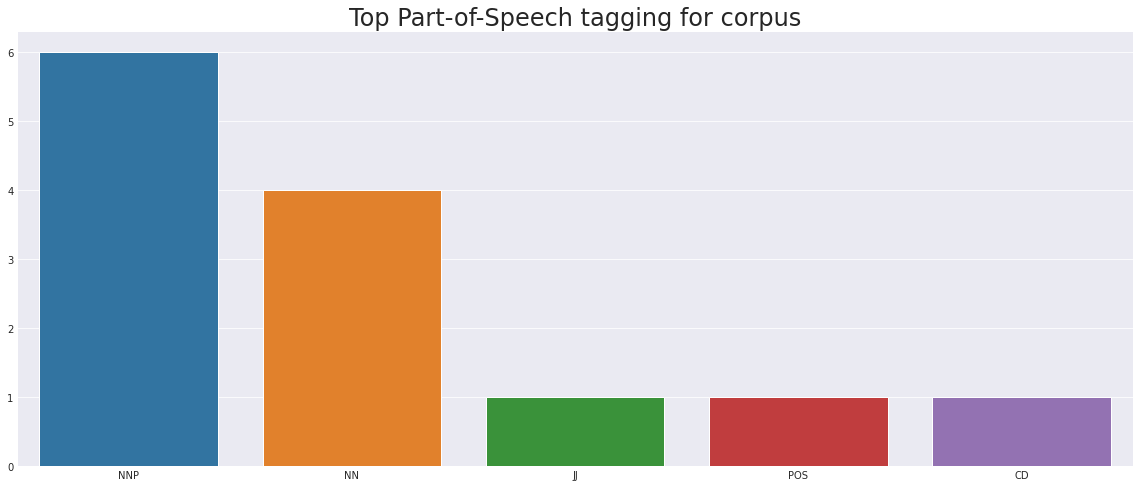

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
blob = TextBlob(str(sentence_df['Text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
sns.barplot(x=pos_df.keys(),y=pos_df.values)
plt.title('Top Part-of-Speech tagging for corpus', fontsize = 24)
# pos_df.iplot(
#     kind='bar',
#     xTitle='POS',
#     yTitle='count', 
#     title='Top 20 Part-of-speech tagging for corpus')

#### Inference
1. This plot represents the frequency of occurance of part-of-speech in the resumes
2. Proper nouns and nouns are used most often in the resumes followed by adjectives <br>
#### labels = 
1. 'NN': 'Noun'
2. 'CD': 'numeral, cardinal'
3. 'JJ': 'adjective or numeral ordinal'
4. 'NNS': 'noun, proper, singular'
5. 'DT': 'determiner'
6. 'VBP': 'verb, base,a plural'
7. 'IN': 'preposition or conjunction, subordinating'
8. 'WP':	'Wh-pronoun'
9. 'PRP$':	'Possessive pronoun'
10.  'VBG':	'Verb, gerund/present participle'
11. 'CC': 'conjunction, coordinating'
12. 'RB':	'Adverb'
13. 'VBD':	'Verb, past tense'
14. 'NNP': 'noun, proper, plural'

In [ ]:
blob = TextBlob(str(df['Clean Text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for Text corpus')
